Importing Libraries

In [2]:
pip install nltk textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import nltk
from textblob import TextBlob


In [4]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\masne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\masne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\masne\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Reading Data

In [5]:
df = pd.read_csv('reviews.csv')


In [6]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


Applying Sentiment Analysis to DataFrame

In [7]:
df['sentiment'] = df['content'].apply(get_sentiment)

Counting Sentiment Categories

In [9]:
sentiment_counts = df['sentiment'].value_counts()

Printing Results

In [10]:
print(sentiment_counts)

sentiment
Positive    11870
Negative     2836
Neutral      2081
Name: count, dtype: int64


Sentiment Distribution Bar Chart

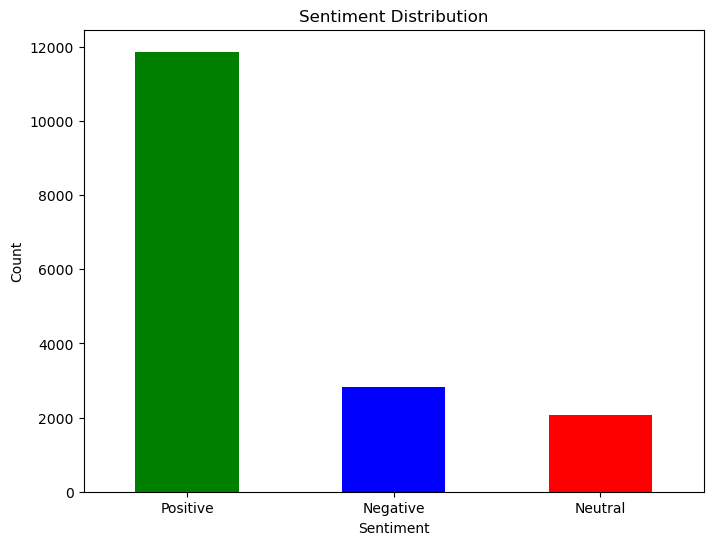

In [10]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Pie Chart for Sentiment Distribution

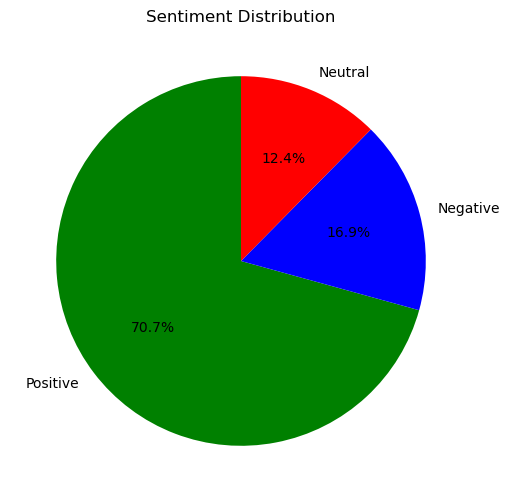

In [11]:
# Plot sentiment distribution as a pie chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()


Word Cloud for Most Frequent Words

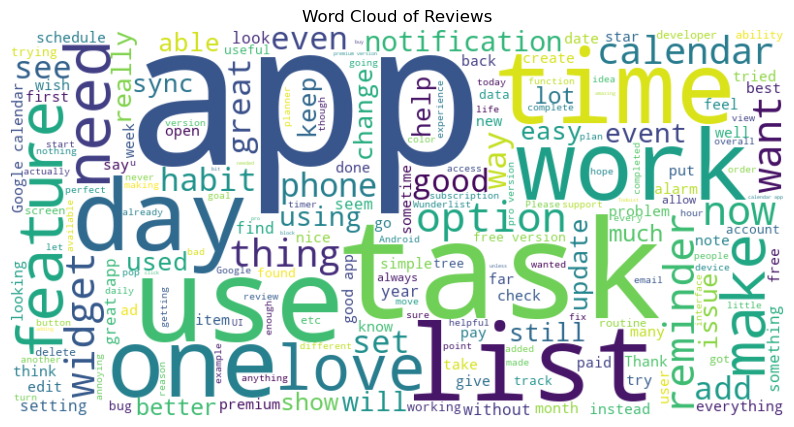

In [12]:
from wordcloud import WordCloud

# Combine all reviews into a single string
text = ' '.join(df['content'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()
